<a href="https://colab.research.google.com/github/annefrancine/DataScience_Estiam/blob/main/r%C3%A9seaux_de_Kohonen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

T rès utilisés dans le data mining, les réseaux de Kohonen (ou SOM, pour Self-Organizing Map) s'inspirent des réseaux neuronaux. Leur principe est des plus simples. À partir d'un corpus d'informations, les réseaux de Kohonen classifient les données et génèrent une carte où elles sont regroupées par zones, en fonction de leurs similarités.

Pour élaborer cette technique, formalisée en 1984, le chercheur finlandais Teuvo Kohonen a pris pour modèle le fonctionnement du cortex cérébral. Chaque région de celui-ci, spécialisée dans une fonction donnée (auditive, visuelle ou sensorielle), est constituée de millions de neurones connectés entre eux. De plus, d'autres neurones, répondant à des stimuli proches, sont situés à proximité dans le cortex. En calquant le fonctionnement des réseaux sur celui des neurones, Kohonen a créé un système dans lequel les cartes établies auto-organisent les données fournies.

Autrement dit, ce n'est pas l'utilisateur, mais l'algorithme de Kohonen qui choisit automatiquement les critères qui président à l'organisation de ces données. Dans la terminologie de Teuvo Kohonen, chaque région correspond à une classe, c'est-à-dire à un ensemble de données répondant aux mêmes caractéristiques. À proximité, se situent d'autres classes aux contenus proches. Le tout est organisé sous forme de grappes.

**L'algorithme classe les données par couleur, automatiquement**

Credit Card Applications
http://archive.ics.uci.edu/ml/datasets/Credit+Approval

This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Credit_Card_Applications.csv to Credit_Card_Applications.csv


In [3]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values# toutes les lignes et la dernière colonne

## Data normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [7]:

!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-cp37-none-any.whl size=8595 sha256=63f1fcd9e8ac78011e9642b307dff67c16044c2e3e9fbc466e0270fe00cf5b21
  Stored in directory: /root/.cache/pip/wheels/de/a0/08/5234d6b02b29c561f62b6c985e2eb7d480fb0b92359a8c74e4
Successfully built MiniSom


documentation : https://github.com/JustGlowing/minisom

In [9]:
#training
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

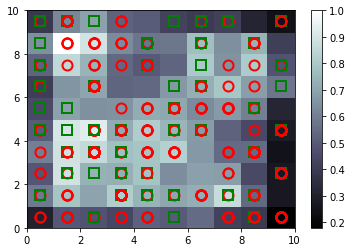

In [10]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x) 
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10,
         markeredgewidth = 2) 
show()

In [11]:
# fraud detection
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(9,2)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5575605e+07 0.0000000e+00 2.4750000e+01 1.3665000e+01 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.5000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 2.8000000e+02 2.0000000e+00]
 [1.5644453e+07 0.0000000e+00 1.8170000e+01 1.0000000e+01 1.0000000e+00
  1.1000000e+01 8.0000000e+00 1.6500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 3.4000000e+02 1.0000000e+00]
 [1.5646594e+07 0.0000000e+00 1.5920000e+01 2.8750000e+00 2.0000000e+00
  1.1000000e+01 4.0000000e+00 8.5000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.2000000e+02 1.0000000e+00]
 [1.5699238e+07 0.0000000e+00 2.2500000e+01 8.4600000e+00 1.0000000e+00
  1.4000000e+01 4.0000000e+00 2.4600000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.6400000e+02 1.0000000e+00]
 [1.5577771e+07 0.0000000e+00 2.9500000e+01 1.0850000e+00 1.0000000e+00
  1.4000000e+01 4.0000000e+00 1.0000000e+00 0.0000000e+00 0.